#### SC2008 Lab 4 (Hendy)

#### Necessary module 

In [11]:
!pip install igraph
!pip install python-igraph

  Using cached python-igraph-0.10.4.tar.gz (9.5 kB)
  Using cached igraph-0.10.4-cp39-abi3-win_amd64.whl (2.9 MB)
  Created wheel for python-igraph: filename=python_igraph-0.10.4-py3-none-any.whl size=9074 sha256=3fecb6ab815d60a4874bfbee03d9f6eed80f623d4594a3519df7f1dfff87eedf
  Stored in directory: c:\users\hendy\appdata\local\pip\cache\wheels\dc\07\ac\bff79052fd6222d1239b228cd24a47222f227c2350f9c4df01
Successfully built python-igraph
  Attempting uninstall: igraph
    Found existing installation: igraph 0.9.9
    Uninstalling igraph-0.9.9:
      Successfully uninstalled igraph-0.9.9


In [2]:
import pandas as pd
import requests
import math

from igraph import Graph, plot

## Setting up dataframe

In [3]:
col_names = [
        "type", "sflow_agent_address", "inputPort", "outputPort", "src_MAC",
        "dst_MAC", "ethernet_type", "in_vlan", "out_vlan", "src_IP", "dst_IP",
        "IP_protocol", "ip_tos", "ip_ttl", "src_transport_port", "dst_transport_port",
        "tcp_flags", "packet_size", "IP_size", "sampling_rate"
    ]

df_sample = pd.read_csv("Lab_4_sample_data.csv")
df =pd.read_csv("SFlow_Data_lab4.csv")

# remove last column because it's all NaN for some reason
df_sample = df_sample.iloc[:,:-1]
df_sample.columns = col_names

df = df.iloc[:,:-1]
df.columns = col_names
df

,type,sflow_agent_address,inputPort,outputPort,src_MAC,dst_MAC,ethernet_type,in_vlan,out_vlan,src_IP,dst_IP,IP_protocol,ip_tos,ip_ttl,src_transport_port,dst_transport_port,tcp_flags,packet_size,IP_size,sampling_rate
0,FLOW,aa.aa.aa.aa,129,193,609c9f851b00,0031466b23cf,0x0800,11.0,919,155.69.160.32,64.233.188.128,6,0x00,56,23159.0,80,0x10,74,52,2048
1,FLOW,aa.aa.aa.aa,137,200,d404ff55fd4d,80711fc76001,0x0800,919.0,280,130.246.176.53,140.115.32.83,6,0x00,50,50041.0,20739,0x10,1518,1500,2048
2,FLOW,aa.aa.aa.aa,129,135,609c9f851b00,002688cd5fc7,0x0800,11.0,919,155.69.160.32,54.169.174.79,17,0x00,120,54241.0,26510,0x10,116,94,2048
3,FLOW,aa.aa.aa.aa,130,199,00239cd087c1,544b8cf9a7df,0x0800,919.0,600,137.132.228.15,193.62.192.8,6,0x00,56,53923.0,34262,0x10,70,52,2048
4,FLOW,aa.aa.aa.aa,129,135,609c9f851b00,002688cd5fc7,0x0800,11.0,919,155.69.160.32,54.255.221.151,17,0x00,120,55069.0,26509,0x10,113,91,2048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69364,FLOW,aa.aa.aa.aa,258,199,204e71cf1b0f,ccef48570144,0x0800,537.0,601,207.241.228.157,210.48.222.9,6,0x00,56,443.0,57434,0x10,1522,1500,2048
69365,FLOW,aa.aa.aa.aa,131,193,00a742233e9e,0031466b23cf,0x0800,43.0,919,192.122.131.36,216.58.203.234,6,0x00,121,4920.0,443,0x10,1442,1420,2048
69366,FLOW,aa.aa.aa.aa,130,199,00239cd087c1,544b8cf9a7df,0x0800,919.0,600,137.132.228.15,193.62.192.8,6,0x00,56,34153.0,3123,0x10,82,64,2048
69367,FLOW,aa.aa.aa.aa,129,193,609c9f851b00,0031466b23cf,0x0800,11.0,919,155.69.196.9,74.125.56.6,17,0x00,58,56221.0,60786,0x10,1267,1245,2048


### EXERCISE 4A: TOP TALKERS AND LISTENERS

In [4]:
# top 5 talkers i assume is the top 5 occurences of "src_IP"
top_talkers = df["src_IP"].value_counts().nlargest(5)
print("Top 5 Talkers\n\n")

for ip in top_talkers.index:
    res = requests.get(f"http://ip-api.com/json/{ip}")
    res_json = res.json()
    org = res_json["org"]
    packet_count = top_talkers[ip]
    
    print(f"IP address: {ip}\t# of packets: {packet_count}\tOrganisation: {org}")

Top 5 Talkers


IP address: 193.62.192.8	# of packets: 3041	Organisation: European Bioinformatics Institute
IP address: 155.69.160.32	# of packets: 2975	Organisation: Nanyang Technological University
IP address: 130.14.250.11	# of packets: 2604	Organisation: National Library of Medicine
IP address: 14.139.196.58	# of packets: 2452	Organisation: Indian Institute of Technology
IP address: 140.112.8.139	# of packets: 2056	Organisation: 


For 140.112.8.139, use https://www.whatismyip.com/ip-address-lookup/ to look up 

IP Address: 140.112.8.139
ASN: 17716
City: Taipei
State/Region: Taipei
Country: TW
Postal Code: 106
##### ISP: Taiwan Academic Network
Time Zone: +08:00
IP2Location.com Results

IP Address: 140.112.8.139
ASN: 17716
City: Tainan
State/Region: Tainan
Country: Taiwan
Postal Code:
##### ISP: National Taiwan University
Time Zone: +0800
ipdata.co Results

##### I assume it to be National Taiwan University

In [5]:
# top 5 talkers i assume is the top 5 occurences of "dst_IP"
top_listeners = df["dst_IP"].value_counts().nlargest(5)
print("Top 5 Listeners\n\n")

for ip in top_listeners.index:
    res = requests.get(f"http://ip-api.com/json/{ip}")
    res_json = res.json()
    org = res_json["org"]
    packet_count = top_listeners[ip]
    
    print(f"IP address: {ip}\t# of packets: {packet_count}\tOrganisation: {org}")

Top 5 Listeners


IP address: 103.37.198.100	# of packets: 3841	Organisation: A*STAR
IP address: 137.132.228.15	# of packets: 3715	Organisation: National University of Singapore
IP address: 202.21.159.244	# of packets: 2446	Organisation: Rpnet
IP address: 192.101.107.153	# of packets: 2368	Organisation: Battelle Memorial Institute, Pacific Northwest Division
IP address: 103.21.126.2	# of packets: 2056	Organisation: Indian Institute of Technology Bombay


### EXERCISE 4B: TRANSPORT PROTOCOL 

In data, IP_protocol available is 6 and 17. TCP = 6, UDP = 17

In [6]:
# TCP = 6, UDP = 17
protocols = df["IP_protocol"].value_counts()

tcp_count = protocols[6]
udp_count = protocols[17]

print(f"TCP packet count: {tcp_count} ({tcp_count/len(df.index)*100:.3f}%)\n" + \
      f"UDP packet count: {udp_count} ({udp_count/len(df.index)*100:.3f}%)")

TCP packet count: 56063 (80.819%)
UDP packet count: 9462 (13.640%)


### EXERCISE 4C: APPLICATIONS PROTOCOL

In [7]:
# go and google what each port represents
top_applications = df["dst_transport_port"].value_counts().nlargest(5)
print(top_applications)

443      13423
80        2647
52866     2068
45512     1356
56152     1341
Name: dst_transport_port, dtype: int64


###### 443     https://www.adminsub.net/tcp-udp-port-finder/443
The service associated with the application protocol port 443 is HTTPS (Hypertext Transfer Protocol Secure). This port is used for secure communication between a web server and a client over the internet using the Transport Layer Security (TLS) or Secure Sockets Layer (SSL) protocol.

When a client connects to a web server using HTTPS, the connection is encrypted, which helps to prevent eavesdropping and tampering of the data being transmitted. HTTPS is commonly used for secure online transactions, such as online banking, e-commerce, and accessing sensitive personal information.

In summary, the service associated with the application protocol port 443 is HTTPS, which provides secure communication over the internet using the TLS or SSL protocol.

###### 80      https://www.adminsub.net/tcp-udp-port-finder/80
The service associated with the application protocol port 80 is HTTP (Hypertext Transfer Protocol). This is the protocol used for transmitting web pages and other web content over the internet.

When a user requests a web page or other web content, the HTTP protocol is used to transmit the data from the web server to the user's web browser. HTTP uses a client-server model, where the web browser acts as the client and the web server acts as the server.

In most cases, HTTP traffic is unencrypted, which means that the data being transmitted can be intercepted and read by anyone who has access to the network. However, it is possible to use HTTPS to encrypt HTTP traffic and provide additional security.

In summary, the service associated with the application protocol port 80 is HTTP, which is used to transmit web pages and other web content over the internet.

###### 52866     https://www.adminsub.net/tcp-udp-port-finder/52866
Dynamic Port

###### 45512     https://www.adminsub.net/tcp-udp-port-finder/45512
Unassigned

###### 56152     https://www.adminsub.net/tcp-udp-port-finder/56152
Dynamic Port


### EXERCISE 4D: TRAFFIC 

In [8]:
# it's IP_size, not packet_size
# size is in bits apparently so just convert to MB (/ (8*1024**2))

total_IP_size = df["IP_size"].sum() / (8*1024**2)
total_packet_size = df["packet_size"].sum()  / (8*1024**2)


print(f"Total traffic: {total_IP_size: .3f} MB")

Total traffic:  7.722 MB


### EXERCISE 4E: ADDITIONAL ANALYSIS 

###### Top 5 communication pairs: Sender -> receiver

In [9]:
top_freq = df.groupby(["src_IP", "dst_IP"])\
             .size()\
             .sort_values(ascending=False)\
             .nlargest(5)

for src_ip, dst_ip in top_freq.index:
    count = top_freq[(src_ip, dst_ip)]
    
    res_src = requests.get(f"http://ip-api.com/json/{src_ip}")
    org_src = res_src.json()["org"] if res_src.status_code == 200 else "No response from server"
    
    res_dst = requests.get(f"http://ip-api.com/json/{dst_ip}")
    org_dst = res_dst.json()["org"] if res_dst.status_code == 200 else "No response from server"
    
    print(f" - Source: {src_ip:15} ({org_src+')':35}\tDestination: {dst_ip:15} ({org_dst+')':35}\tPacket count: {count}\n")
          

 - Source: 193.62.192.8    (European Bioinformatics Institute) 	Destination: 137.132.228.15  (National University of Singapore)  	Packet count: 3041

 - Source: 130.14.250.11   (National Library of Medicine)      	Destination: 103.37.198.100  (A*STAR)                            	Packet count: 2599

 - Source: 14.139.196.58   (Indian Institute of Technology)    	Destination: 192.101.107.153 (Battelle Memorial Institute, Pacific Northwest Division)	Packet count: 2368

 - Source: 140.112.8.139   ()                                  	Destination: 103.21.126.2    (Indian Institute of Technology Bombay)	Packet count: 2056

 - Source: 137.132.228.15  (National University of Singapore)  	Destination: 193.62.192.8    (European Bioinformatics Institute) 	Packet count: 1910



### Graphical visualisation of the network monitoring (Top 100 sender->receiver pairs)

In [ ]:
# decided to just use the IPs and not the organisation name since it would just result in a bunch of 429 responses.
graph_series = df.groupby(["src_IP", "dst_IP"])\
             .size()\
             .nlargest(100)   
                       
graph_df = graph_series.to_frame().reset_index()
tuple_list = [tuple(edge) for edge in graph_df.head(n=100).to_numpy()]

g = Graph.TupleList(tuple_list, directed=True, weights=True)

g.vs["size"] = 15
g.vs["label_size"] = 9
g.vs["label"] = g.vs["name"]

g.es["width"] =  [max(math.log(weight)/1.5, 0) for weight in g.es['weight']]
g.es["arrow_size"] = [width / 5 for width in g.es["width"]]

# simple look
plot(g, "network_graph.svg", bbox=(1000, 1000))

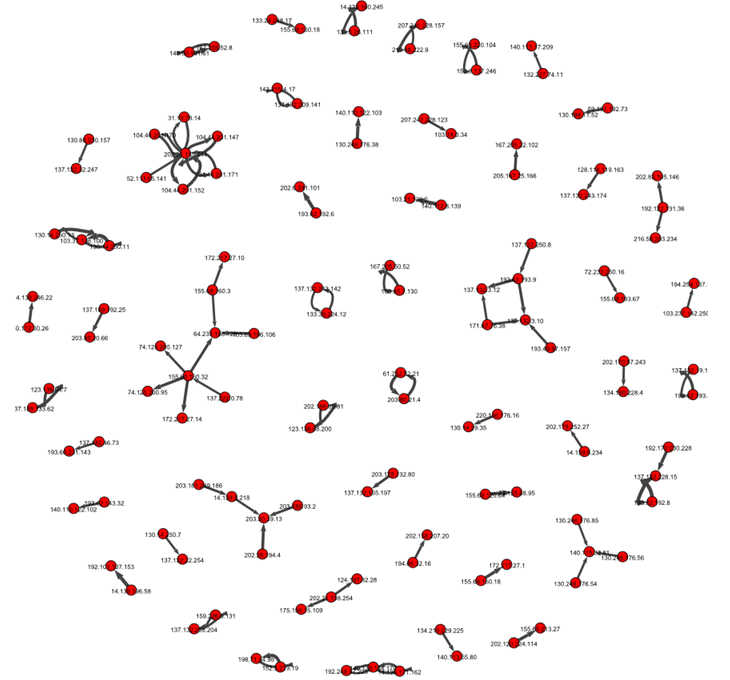